In [1]:
import matplotlib.pyplot as plt
from tratando_sinal import Sinal

In [2]:
sinal1 = Sinal("0.txt")

sinal_original    1.480297e-20
dtype: float64


In [3]:
print(sinal1.sinal_modificado)

       sinal_original  modificado
10000        0.004099         0.0
10001        0.003864         0.0
10002        0.003802         0.0
10003        0.003395         0.0
10004        0.003333         0.0
...               ...         ...
99995        0.000177         0.0
99996       -0.000105         0.0
99997       -0.000730         0.0
99998       -0.000042         0.0
99999       -0.000714         0.0

[90000 rows x 2 columns]


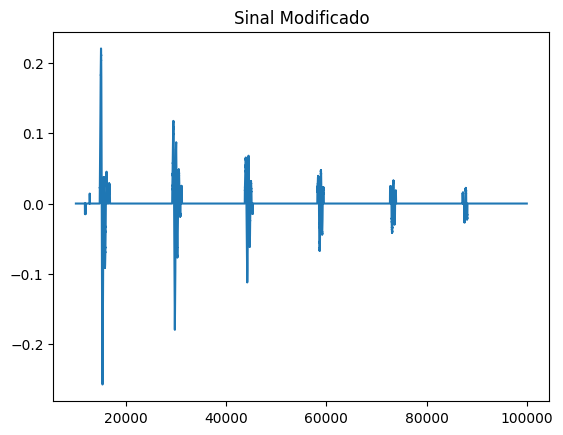

In [4]:
sinal1.plot_sinal("modificado")

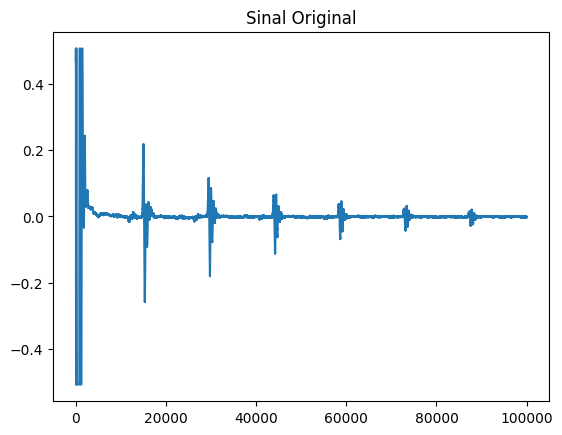

In [5]:
sinal1.plot_sinal("original")